**Spam messages classification**


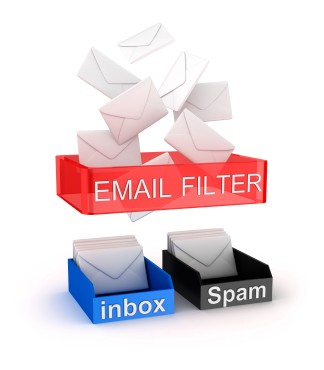


Text mining (deriving information from text) is a wide field which has gained popularity with the huge text data being generated. Automation of a number of applications like sentiment analysis, document classification, topic classification, text summarization, machine translation, etc has been done using machine learning models.

Spam filtering is a beginner’s example of document classification task which involves classifying an email as spam or non-spam (a.k.a. ham) mail. Spam box in your Gmail account is the best example of this. So lets get started in building a spam filter on a publicly available mail corpus. I have extracted equal number of spam and non-spam emails from Ling-spam corpus. The extracted subset on which we will be working can be downloaded from here.

We will walk through the following steps to build this application :

Preparing the text data.
Creating word dictionary.
Feature extraction process
Training the classifier

In [4]:
cd MyDrive/

/content/drive/MyDrive


In [13]:
msg = pd.read_csv('SMSSpamCollection',sep = '\t',names = ["label",'messages'])

In [14]:
msg

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import  PorterStemmer

ps = PorterStemmer()
corpus= []


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
for i in range(0,len(msg)):
  review = re.sub('[^a-zA-Z]',' ',msg['messages'][i])
  review = review.lower()
  review = review.split()

  #lamatization
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)






In [23]:
#creating BOG
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(max_features = 2500) # discariding the lower frequece words

X = cv.fit_transform(corpus).toarray()



y = pd.get_dummies(msg['label'])  #mapping label to 0 and 1
y = y.iloc[:,1].values


#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size =.20,random_state = 0)



In [24]:
#train model

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,Y_train)

Y_pred = spam_detect_model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(Y_test,Y_pred)

In [26]:
confusion_m

array([[946,   9],
       [  7, 153]])

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,Y_pred)
print(acc)

0.9856502242152466


We got 98% accuracy with stemming